In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

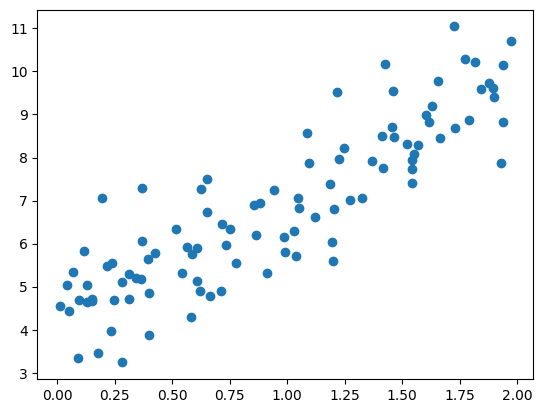

In [17]:
plt.scatter(X,y)
plt.show()

In [18]:
# Step 2: Initialize parameters
def initialize_parameters():
    w = np.random.randn()  # Random initialization for weight
    b = np.random.randn()  # Random initialization for bias
    return w, b

In [19]:
# Step 3: Define the model prediction
def predict(X, w, b):
    return w * X + b

In [20]:
# Step 4: Define the cost function (MSE)
def compute_cost(X, y, w, b):
    n = len(X)
    predictions = predict(X, w, b)
    cost = np.sum((predictions - y) ** 2) / n
    return cost

In [21]:
# Step 5: Implement gradient descent
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    n = len(X)
    for i in range(num_iterations):
        predictions = predict(X, w, b)
        
        # Compute gradients
        dw = (2 / n) * np.sum(X * (predictions - y))
        db = (2 / n) * np.sum(predictions - y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b

In [22]:
# Step 6: Train the model
w, b = initialize_parameters()
learning_rate = 0.01
num_iterations = 1000

w, b = gradient_descent(X, y, w, b, learning_rate, num_iterations)

print("\nFinal Parameters:")
print(f"w = {w}, b = {b}")

Iteration 0: Cost = 29.60472891885286
Iteration 100: Cost = 0.8179689294413484
Iteration 200: Cost = 0.8091883314390853
Iteration 300: Cost = 0.8079029870860006
Iteration 400: Cost = 0.8072524977831467
Iteration 500: Cost = 0.8069229497824643
Iteration 600: Cost = 0.8067559955630038
Iteration 700: Cost = 0.8066714139198339
Iteration 800: Cost = 0.8066285635241722
Iteration 900: Cost = 0.8066068548372805

Final Parameters:
w = 2.7755308615708514, b = 4.208960473926773


In [23]:
# Step 7: Make predictions
X_new = np.array([[0], [2]])  # New data points
y_pred = predict(X_new, w, b)

print("\nPredictions:")
for i, x in enumerate(X_new):
    print(f"X = {x[0]} --> Predicted y = {y_pred[i][0]}")


Predictions:
X = 0 --> Predicted y = 4.208960473926773
X = 2 --> Predicted y = 9.760022197068476


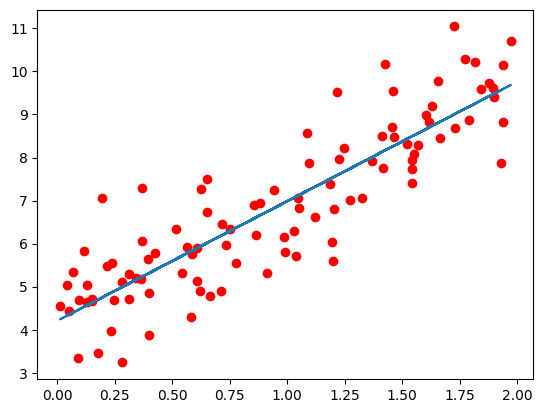

In [24]:
plt.scatter(X, y, color= 'red')
plt.plot(X, predict(X, w, b))
plt.show()

In [25]:
w1 = w
b1 = b

In [26]:
# Step 5: Implement gradient descent
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    n = len(X)
    for i in range(num_iterations):
        predictions = predict(X, w, b)
        
        # Compute gradients
        dw = (2 / n) * np.sum(X * (predictions - y))
        # Update parameters
        w -= learning_rate * dw
        
        db = (2 / n) * np.sum(predictions - y)
        # Update parameters        
        b -= learning_rate * db
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b

In [27]:
# Step 6: Train the model
w, b = initialize_parameters()
learning_rate = 0.01
num_iterations = 1000

w, b = gradient_descent(X, y, w, b, learning_rate, num_iterations)

print("\nFinal Parameters:")
print(f"w = {w}, b = {b}")

Iteration 0: Cost = 21.164502916960146
Iteration 100: Cost = 0.8783129673463776
Iteration 200: Cost = 0.8407006272258251
Iteration 300: Cost = 0.8238678178198512
Iteration 400: Cost = 0.8153405331030011
Iteration 500: Cost = 0.811020476155744
Iteration 600: Cost = 0.8088318671085288
Iteration 700: Cost = 0.8077230832151484
Iteration 800: Cost = 0.8071613557911561
Iteration 900: Cost = 0.8068767758105581

Final Parameters:
w = 2.7504986570066126, b = 4.237311261657942


In [28]:
# Step 7: Make predictions
X_new = np.array([[0], [2]])  # New data points
y_pred = predict(X_new, w, b)

print("\nPredictions:")
for i, x in enumerate(X_new):
    print(f"X = {x[0]} --> Predicted y = {y_pred[i][0]}")


Predictions:
X = 0 --> Predicted y = 4.237311261657942
X = 2 --> Predicted y = 9.738308575671166


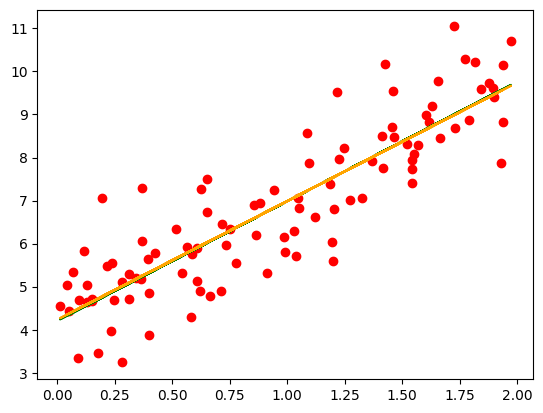

In [29]:
plt.scatter(X, y, color= 'red')
plt.plot(X, predict(X, w1, b1), color = 'green')
plt.plot(X, predict(X, w, b), color = 'orange')
plt.show()

In [46]:
# Closed Form

In [30]:
import numpy as np

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Step 2: Add a column of ones to X for the bias term
X_b = np.c_[np.ones((100, 1)), X]  # Shape: (100, 2)

# Step 3: Compute the closed-form solution (Normal Equation)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract the parameters
b = theta_best[0][0]  # Bias term
w = theta_best[1][0]  # Weight term

print("\nFinal Parameters:")
print(f"w = {w}, b = {b}")

# Step 4: Make predictions
X_new = np.array([[0], [2]])  # New data points
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias column
y_pred = X_new_b.dot(theta_best)

print("\nPredictions:")
for i, x in enumerate(X_new):
    print(f"X = {x[0]} --> Predicted y = {y_pred[i][0]:.3f}")


Final Parameters:
w = 2.7701133864384806, b = 4.21509615754675

Predictions:
X = 0 --> Predicted y = 4.215
X = 2 --> Predicted y = 9.755


In [31]:
import numpy as np

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Step 2: Define the fitness function (MSE)
def compute_mse(individual, X, y):
    w, b = individual
    predictions = w * X + b
    mse = np.mean((predictions - y) ** 2)
    return mse

# Step 3: Initialize the population
def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        w = np.random.uniform(-10, 10)  # Random weight
        b = np.random.uniform(-10, 10)  # Random bias
        population.append([w, b])
    return population

# Step 4: Selection (Tournament Selection)
def select_parents(population, fitness_scores, num_parents):
    parents = []
    for _ in range(num_parents):
        # Randomly select two individuals and pick the one with better fitness
        idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
        if fitness_scores[idx1] < fitness_scores[idx2]:
            parents.append(population[idx1])
        else:
            parents.append(population[idx2])
    return parents

# Step 5: Crossover
def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = np.random.choice(len(parents), size=2, replace=False)
        w1, b1 = parents[parent1]
        w2, b2 = parents[parent2]
        # Single-point crossover
        w = (w1 + w2) / 2
        b = (b1 + b2) / 2
        offspring.append([w, b])
    return offspring

# Step 6: Mutation
def mutate(individual, mutation_rate):
    w, b = individual
    if np.random.rand() < mutation_rate:
        w += np.random.uniform(-0.5, 0.5)  # Small random change to weight
    if np.random.rand() < mutation_rate:
        b += np.random.uniform(-0.5, 0.5)  # Small random change to bias
    return [w, b]

# Step 7: Genetic Algorithm
def genetic_algorithm(X, y, pop_size=20, num_generations=100, mutation_rate=0.1):
    population = initialize_population(pop_size)
    
    for generation in range(num_generations):
        # Evaluate fitness
        fitness_scores = [compute_mse(individual, X, y) for individual in population]
        
        # Print best fitness
        best_fitness = min(fitness_scores)
        print(f"Generation {generation}: Best MSE = {best_fitness:.4f}")
        
        # Select parents
        parents = select_parents(population, fitness_scores, num_parents=pop_size // 2)
        
        # Create offspring
        offspring = crossover(parents, offspring_size=pop_size - len(parents))
        
        # Mutate offspring
        offspring = [mutate(ind, mutation_rate) for ind in offspring]
        
        # Form new population
        population = parents + offspring
    
    # Find the best individual
    fitness_scores = [compute_mse(individual, X, y) for individual in population]
    best_idx = np.argmin(fitness_scores)
    best_individual = population[best_idx]
    
    return best_individual

# Step 8: Run the Genetic Algorithm
best_individual = genetic_algorithm(X, y, pop_size=50, num_generations=100, mutation_rate=0.1)

# Extract the best parameters
w_best, b_best = best_individual
print("\nBest Parameters:")
print(f"w = {w_best}, b = {b_best}")

# Step 9: Make predictions
X_new = np.array([[0], [2]])  # New data points
y_pred = w_best * X_new + b_best

print("\nPredictions:")
for i, x in enumerate(X_new):
    print(f"X = {x[0]} --> Predicted y = {y_pred[i][0]:.3f}")

Generation 0: Best MSE = 2.1607
Generation 1: Best MSE = 1.3063
Generation 2: Best MSE = 1.0390
Generation 3: Best MSE = 0.8702
Generation 4: Best MSE = 0.8454
Generation 5: Best MSE = 0.8454
Generation 6: Best MSE = 0.8454
Generation 7: Best MSE = 0.8454
Generation 8: Best MSE = 0.8454
Generation 9: Best MSE = 0.8454
Generation 10: Best MSE = 0.8454
Generation 11: Best MSE = 0.8454
Generation 12: Best MSE = 0.8446
Generation 13: Best MSE = 0.8428
Generation 14: Best MSE = 0.8421
Generation 15: Best MSE = 0.8421
Generation 16: Best MSE = 0.8372
Generation 17: Best MSE = 0.8417
Generation 18: Best MSE = 0.8373
Generation 19: Best MSE = 0.8373
Generation 20: Best MSE = 0.8373
Generation 21: Best MSE = 0.8349
Generation 22: Best MSE = 0.8349
Generation 23: Best MSE = 0.8349
Generation 24: Best MSE = 0.8355
Generation 25: Best MSE = 0.8355
Generation 26: Best MSE = 0.8314
Generation 27: Best MSE = 0.8340
Generation 28: Best MSE = 0.8293
Generation 29: Best MSE = 0.8293
Generation 30: Best 

In [49]:
import numpy as np

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Step 2: Define the fitness function (MSE)
def compute_mse(individual, X, y):
    w, b = individual
    predictions = w * X + b
    mse = np.mean((predictions - y) ** 2)
    return mse

# Step 3: Initialize the population
def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        w = np.random.uniform(-10, 10)  # Random weight
        b = np.random.uniform(-10, 10)  # Random bias
        population.append([w, b])
    return population

# Step 4: Selection (Tournament Selection)
def select_parents(population, fitness_scores, num_parents):
    parents = []
    for _ in range(num_parents):
        # Randomly select two individuals and pick the one with better fitness
        idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
        if fitness_scores[idx1] < fitness_scores[idx2]:
            parents.append(population[idx1])
        else:
            parents.append(population[idx2])
    return parents

# Step 5: Crossover
def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = np.random.choice(len(parents), size=2, replace=False)
        w1, b1 = parents[parent1]
        w2, b2 = parents[parent2]
        # Single-point crossover
        w = (w1 + w2) / 2
        b = (b1 + b2) / 2
        offspring.append([w, b])
    return offspring

# Step 6: Mutation
def mutate(individual, mutation_rate):
    w, b = individual
    if np.random.rand() < mutation_rate:
        w += np.random.uniform(-0.5, 0.5)  # Small random change to weight
    if np.random.rand() < mutation_rate:
        b += np.random.uniform(-0.5, 0.5)  # Small random change to bias
    return [w, b]

# Step 7: Genetic Algorithm
def genetic_algorithm(X, y, pop_size=20, num_generations=100, mutation_rate=0.1):
    population = initialize_population(pop_size)
    
    for generation in range(num_generations):
        # Evaluate fitness
        fitness_scores = [compute_mse(individual, X, y) for individual in population]
        
        # Print best fitness
        best_fitness = min(fitness_scores)
        print(f"Generation {generation}: Best MSE = {best_fitness:.4f}")
        
        # Select parents
        parents = select_parents(population, fitness_scores, num_parents=pop_size // 2)
        
        # Create offspring
        offspring = crossover(parents, offspring_size=pop_size - len(parents))
        
        # Mutate offspring
        offspring = [mutate(ind, mutation_rate) for ind in offspring]
        
        # Form new population
        population = parents + offspring
    
    # Find the best individual
    fitness_scores = [compute_mse(individual, X, y) for individual in population]
    best_idx = np.argmin(fitness_scores)
    best_individual = population[best_idx]
    
    return best_individual

# Step 8: Run the Genetic Algorithm
best_individual = genetic_algorithm(X, y, pop_size=50, num_generations=100, mutation_rate=0.1)

# Extract the best parameters
w_best, b_best = best_individual
print("\nBest Parameters:")
print(f"w = {w_best}, b = {b_best}")

# Step 9: Make predictions
X_new = np.array([[0], [2]])  # New data points
y_pred = w_best * X_new + b_best

print("\nPredictions:")
for i, x in enumerate(X_new):
    print(f"X = {x[0]} --> Predicted y = {y_pred[i][0]:.3f}")

Generation 0: Best MSE = 2.1607
Generation 1: Best MSE = 1.3063
Generation 2: Best MSE = 1.0390
Generation 3: Best MSE = 0.8702
Generation 4: Best MSE = 0.8454
Generation 5: Best MSE = 0.8454
Generation 6: Best MSE = 0.8454
Generation 7: Best MSE = 0.8454
Generation 8: Best MSE = 0.8454
Generation 9: Best MSE = 0.8454
Generation 10: Best MSE = 0.8454
Generation 11: Best MSE = 0.8454
Generation 12: Best MSE = 0.8446
Generation 13: Best MSE = 0.8428
Generation 14: Best MSE = 0.8421
Generation 15: Best MSE = 0.8421
Generation 16: Best MSE = 0.8372
Generation 17: Best MSE = 0.8417
Generation 18: Best MSE = 0.8373
Generation 19: Best MSE = 0.8373
Generation 20: Best MSE = 0.8373
Generation 21: Best MSE = 0.8349
Generation 22: Best MSE = 0.8349
Generation 23: Best MSE = 0.8349
Generation 24: Best MSE = 0.8355
Generation 25: Best MSE = 0.8355
Generation 26: Best MSE = 0.8314
Generation 27: Best MSE = 0.8340
Generation 28: Best MSE = 0.8293
Generation 29: Best MSE = 0.8293
Generation 30: Best 